# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

In [2]:
def load_data(file):
    """
    TODO: add description
    """
    
    with open(file, mode='rb') as f:
        data = pickle.load(f)
    return data['features'], data['labels']

In [3]:
def save_data(file, features, labels):
    """
    TODO: add description
    """
    
    print("\nSaving Data...")
    data = {}
    data['features'] = features
    data['labels'] = labels
    try:
        with open(file, mode='wb') as f:
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)  
    except Exception as e:
        print("Saving exception error on:", file, ":", e)
        raise
    print("\nSaved Data!")

In [4]:
X_train, y_train = load_data(training_file)
X_valid, y_valid = load_data(validation_file)
X_test, y_test   = load_data(testing_file)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
imshape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", imshape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
import pandas as pd
import warnings

%matplotlib inline


In [7]:
label = {}
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for row in reader:
        label[int(row[0])] = row[1]

In [8]:
def show_images(feature_set, label_set):
    """
    TODO: Add description
    """

    plt.figure(figsize=(32,32))
    for i in range(n_classes):
        plt.subplot(n_classes//4+1,4,i+1)
        img_class = feature_set[np.where(label_set == i)]
        if img_class[0].ndim > 2:
            plt.imshow(img_class[0])
        else:
            plt.imshow(img_class[0], cmap = 'gray')
        plt.title(label[i])
        plt.axis('off')
    plt.show()
    

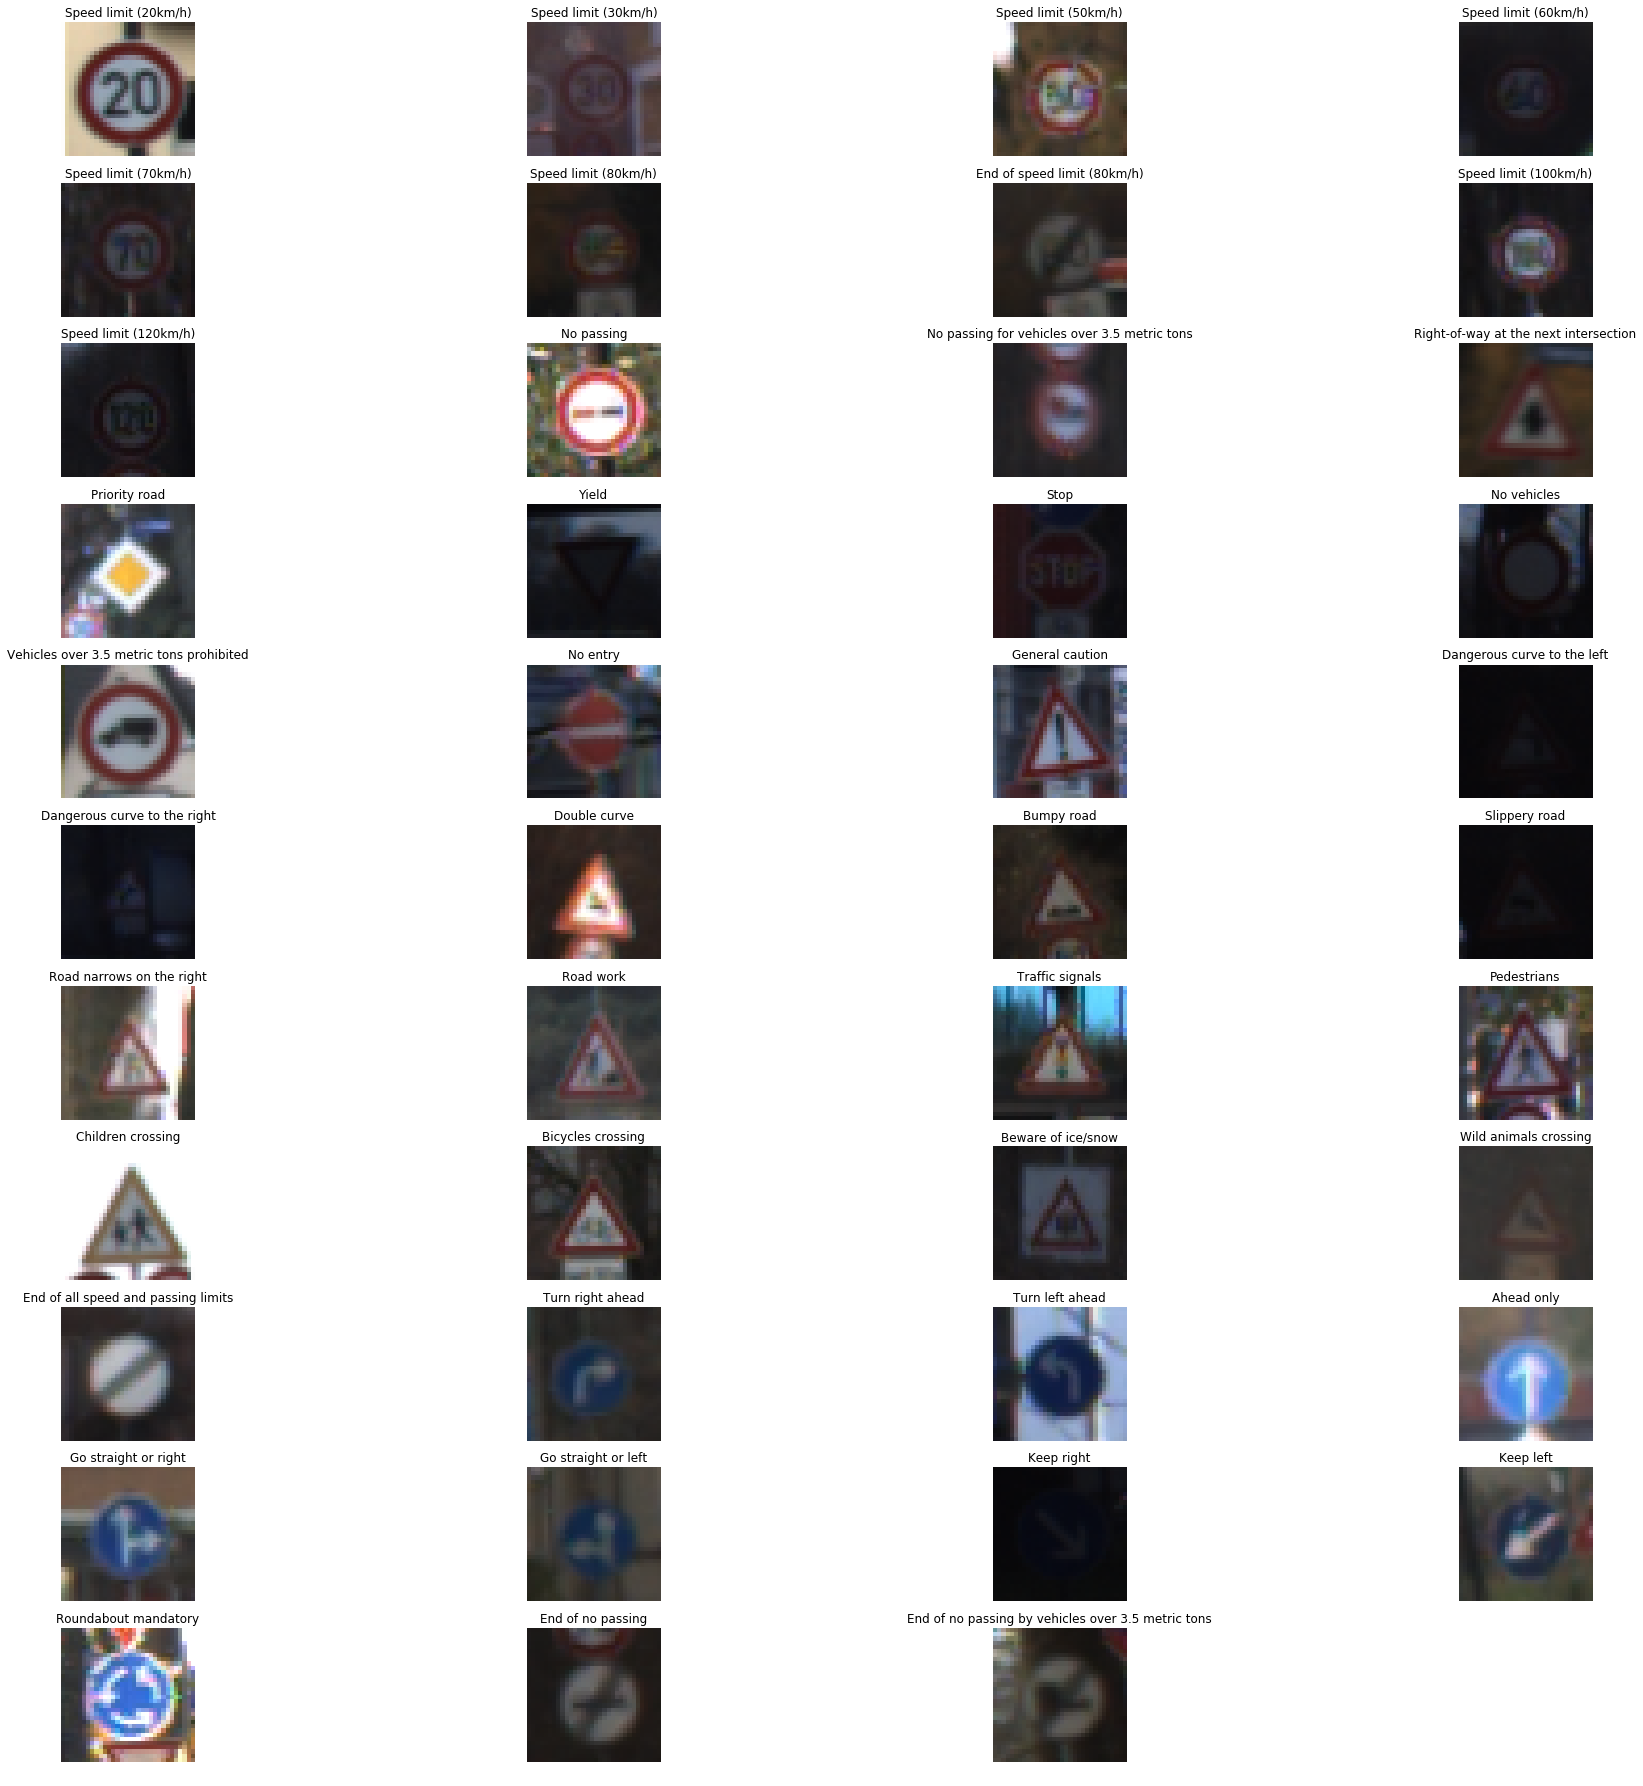

In [9]:
show_images(X_train, y_train)

In [10]:
y_train_df = pd.DataFrame()
y_valid_df = pd.DataFrame()
y_train_df['label'] = y_train
y_valid_df['label'] = y_valid

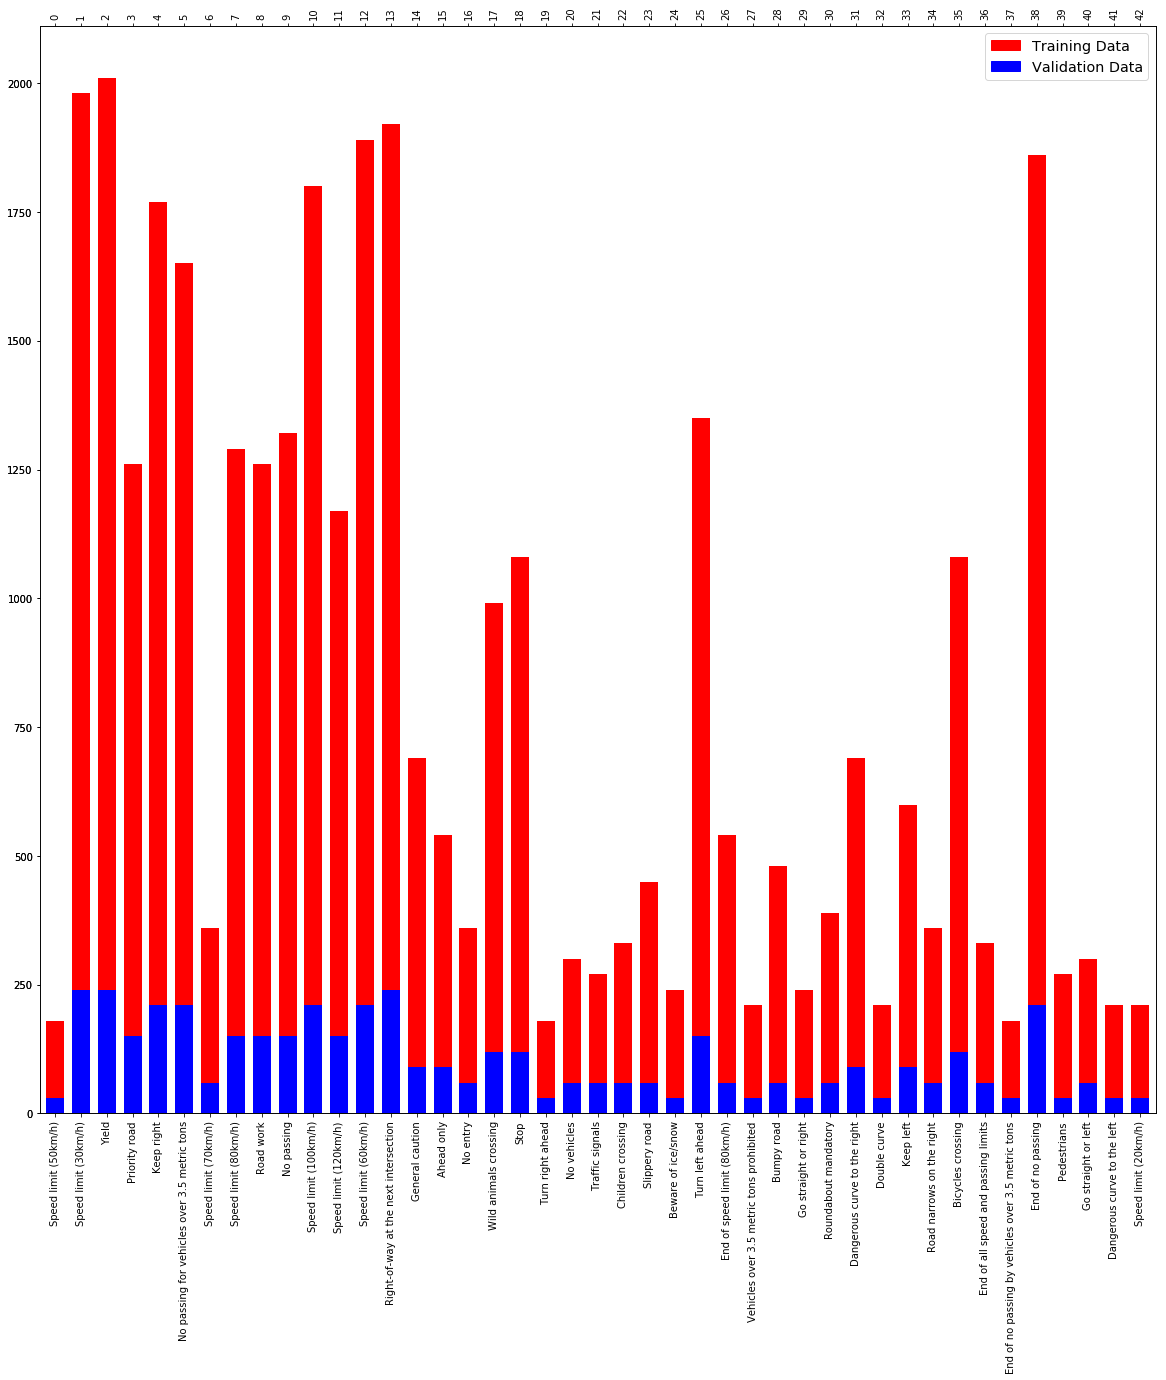

In [11]:
fig = plt.figure(figsize=(20,20))

train_chart = fig.add_subplot(111)
valid_chart = train_chart.twiny()

width = 0.7

train_handle = y_train_df['label'].value_counts().sort_index().plot(kind='bar', color='red', 
                                                     ax = train_chart, width = width)
valid_handle = y_valid_df['label'].value_counts().sort_index().plot(kind='bar', color='blue', 
                                                     ax = valid_chart, width = width)
train_chart.set_xticklabels(list(map(lambda x: label[x], y_train_df['label'].value_counts().index.tolist())), 
                            rotation = 'vertical') 

red_patch = mpatches.Patch(color='red', label='Training Data')
blue_patch = mpatches.Patch(color='blue', label='Validation Data')
plt.legend(handles=[red_patch, blue_patch],fontsize = 'x-large')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [133]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Normalize Data

In [13]:
from skimage import exposure
import os
import warnings
from tqdm import tqdm
import cv2

normalization = False

In [14]:
def adapt_hist(image_data):
    """
    TODO: add description
    """
    gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in 
                                       image_data])
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) 
                         for image in tqdm(gray)])
    
def clahe(image_data):
    """
    TODO: add description
    """
    clahe = cv2.createCLAHE(clipLimit=0.0003, tileGridSize=(32,32))
    if image_data.ndim < 4:
         return np.array([clahe.apply(img) for img in tqdm(image_data)])
    else:
        gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in 
                                       image_data])
        return np.array([clahe.apply(img) for img in tqdm(gray)])


                     

In [15]:
norm_training_file   = './data/train_norm.p'
norm_validation_file = './data/valid_norm.p'
norm_testing_file    = './data/test_norm.p'

norm_type = 'adapt_hist'

In [16]:
def normalize(features, norm_ftype):
    data = {}
    print("\nNormalizing Set...")
    exec("data['features'] = "+norm_ftype+'(features)')   
    return np.array(data['features'])   

In [17]:
if not os.path.isfile(norm_training_file) or normalization:
    X_train_norm = normalize(X_train, norm_type)
    save_data(norm_training_file, X_train_norm, y_train)
    
if not os.path.isfile(norm_validation_file) or normalization:
    X_valid_norm = normalize(X_valid, norm_type)
    save_data(norm_validation_file, X_valid_norm, y_valid)
    
if not os.path.isfile(norm_testing_file) or normalization:
    X_test_norm = normalize(X_test,  norm_type)
    save_data(norm_testing_file, X_test_norm, y_test)
    

In [18]:
X_train, y_train = load_data(norm_training_file)
X_valid, y_valid = load_data(norm_validation_file)
X_test, y_test   = load_data(norm_testing_file)

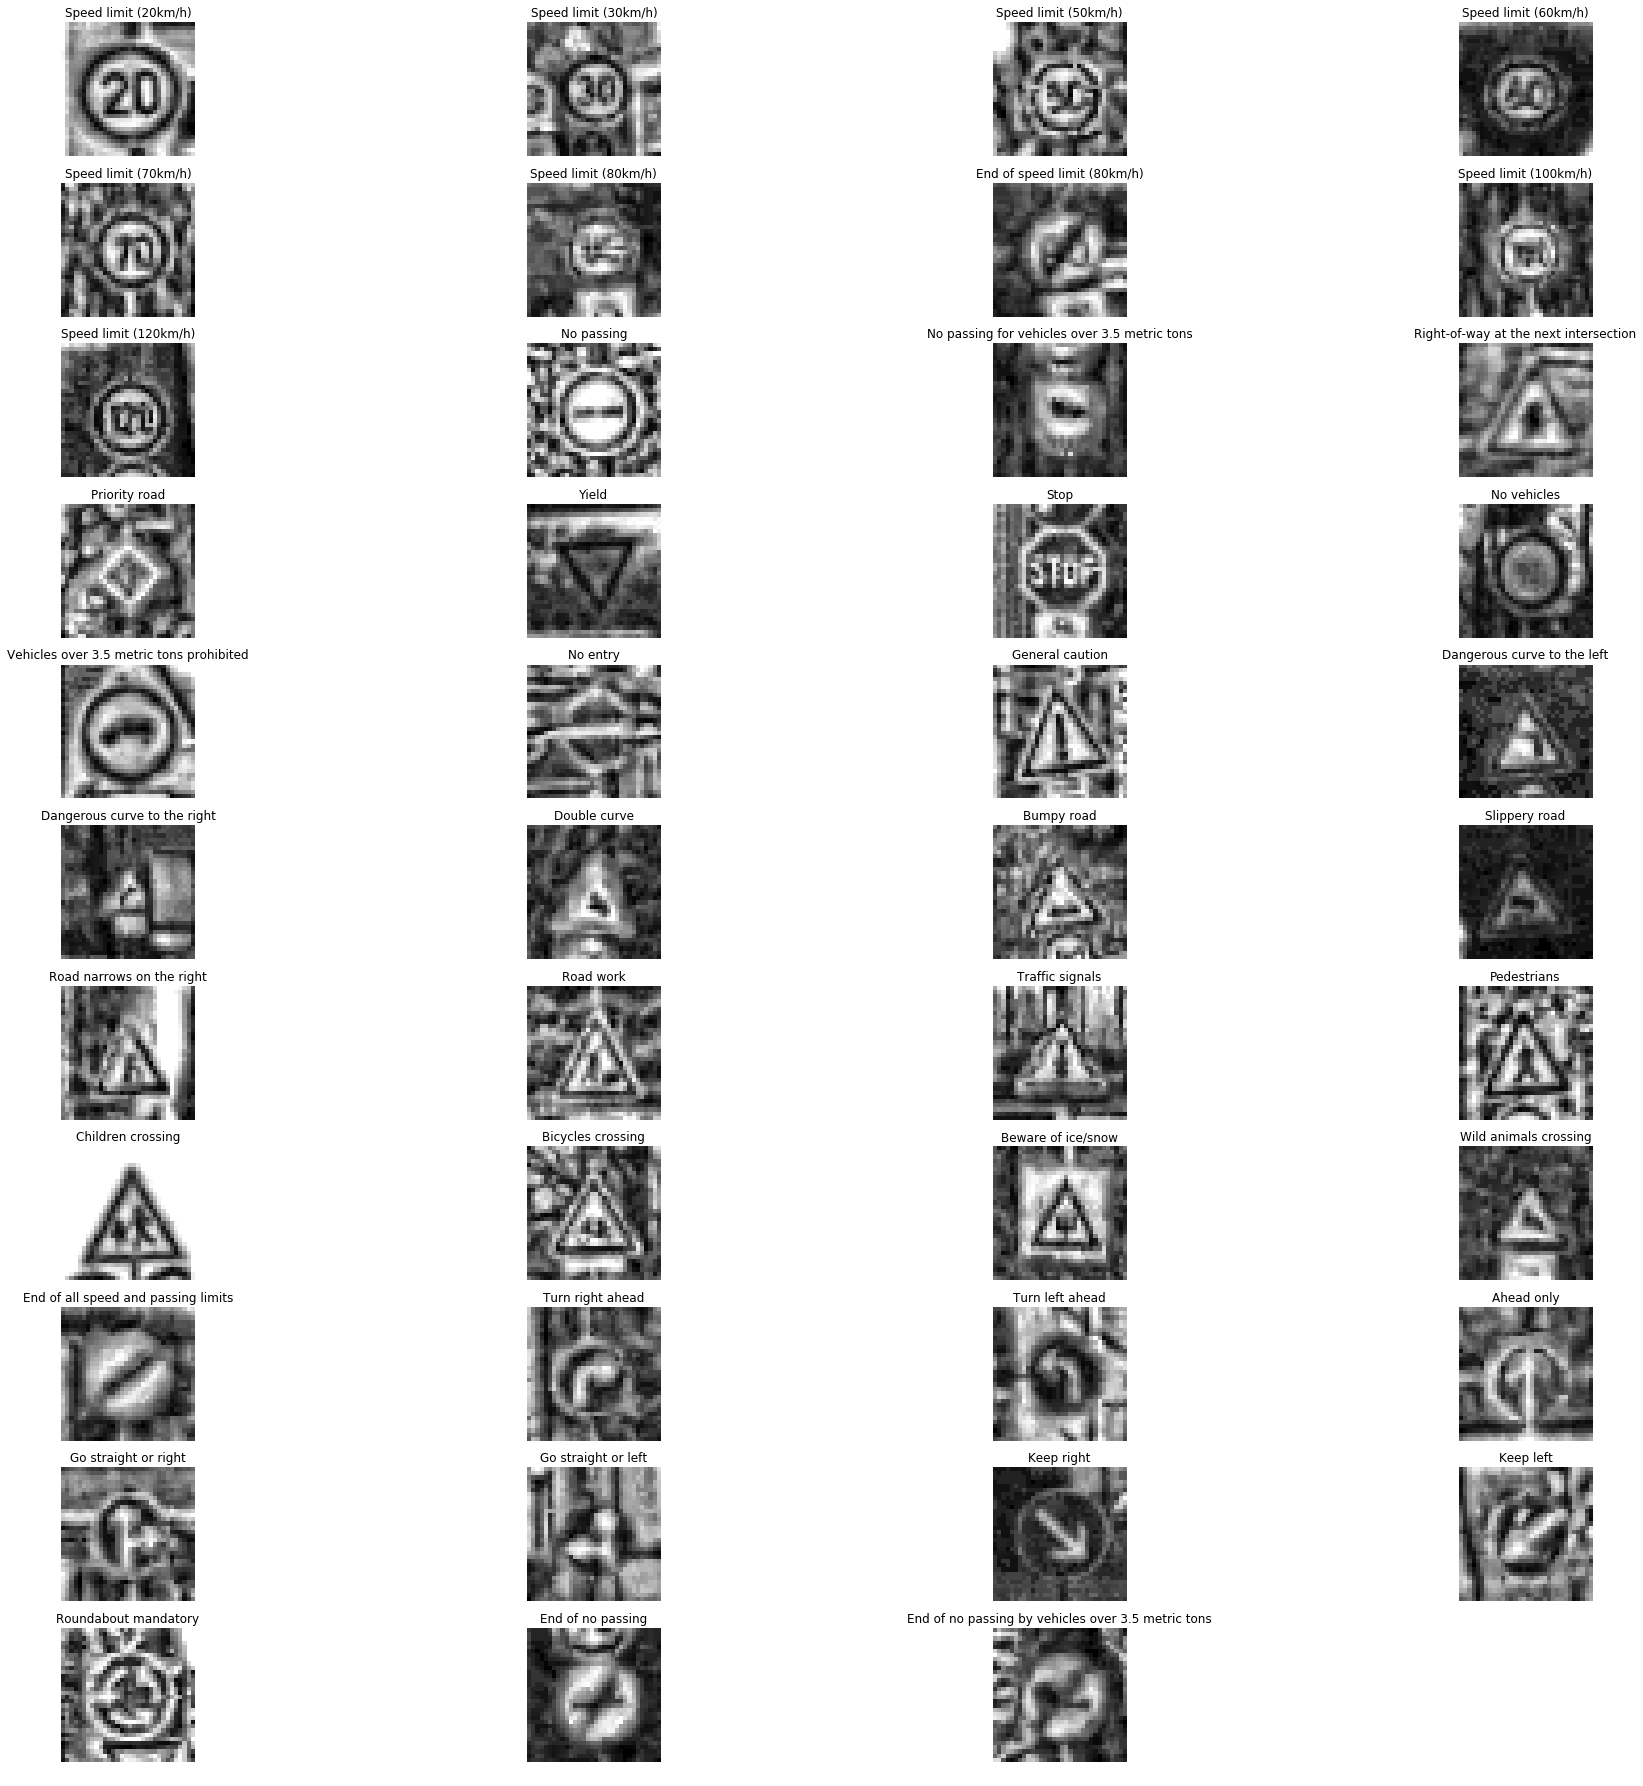

In [19]:
show_images(X_train, y_train)

#### Resize

In [20]:
resized_training_file   = './data/train_resize.p'
resized_validation_file = './data/valid_resize.p'
resized_testing_file    = './data/test_resize.p'

resizing = False

In [21]:
if not os.path.isfile(resized_training_file) or resizing:
    X_train_resize = np.array([cv2.resize(img,None,fx=4,fy=4, 
                                       interpolation = cv2.INTER_CUBIC) for img in X_train])
    save_data(resized_training_file, X_train_resize, y_train)

if not os.path.isfile(resized_validation_file) or resizing:
    X_valid_resize = np.array([cv2.resize(img,None,fx=4,fy=4, 
                                          interpolation = cv2.INTER_CUBIC) for img in X_valid])
    save_data(resized_validation_file, X_valid_resize, y_valid)

if not os.path.isfile(resized_testing_file) or resizing:
    X_test_resize = np.array([cv2.resize(img,None,fx=4,fy=4, 
                                         interpolation = cv2.INTER_CUBIC) for img in X_test])
    save_data(resized_testing_file, X_test_resize, y_test)

In [22]:
X_train, y_train = load_data(resized_training_file)
X_valid, y_valid = load_data(resized_validation_file)
X_test, y_test   = load_data(resized_testing_file)

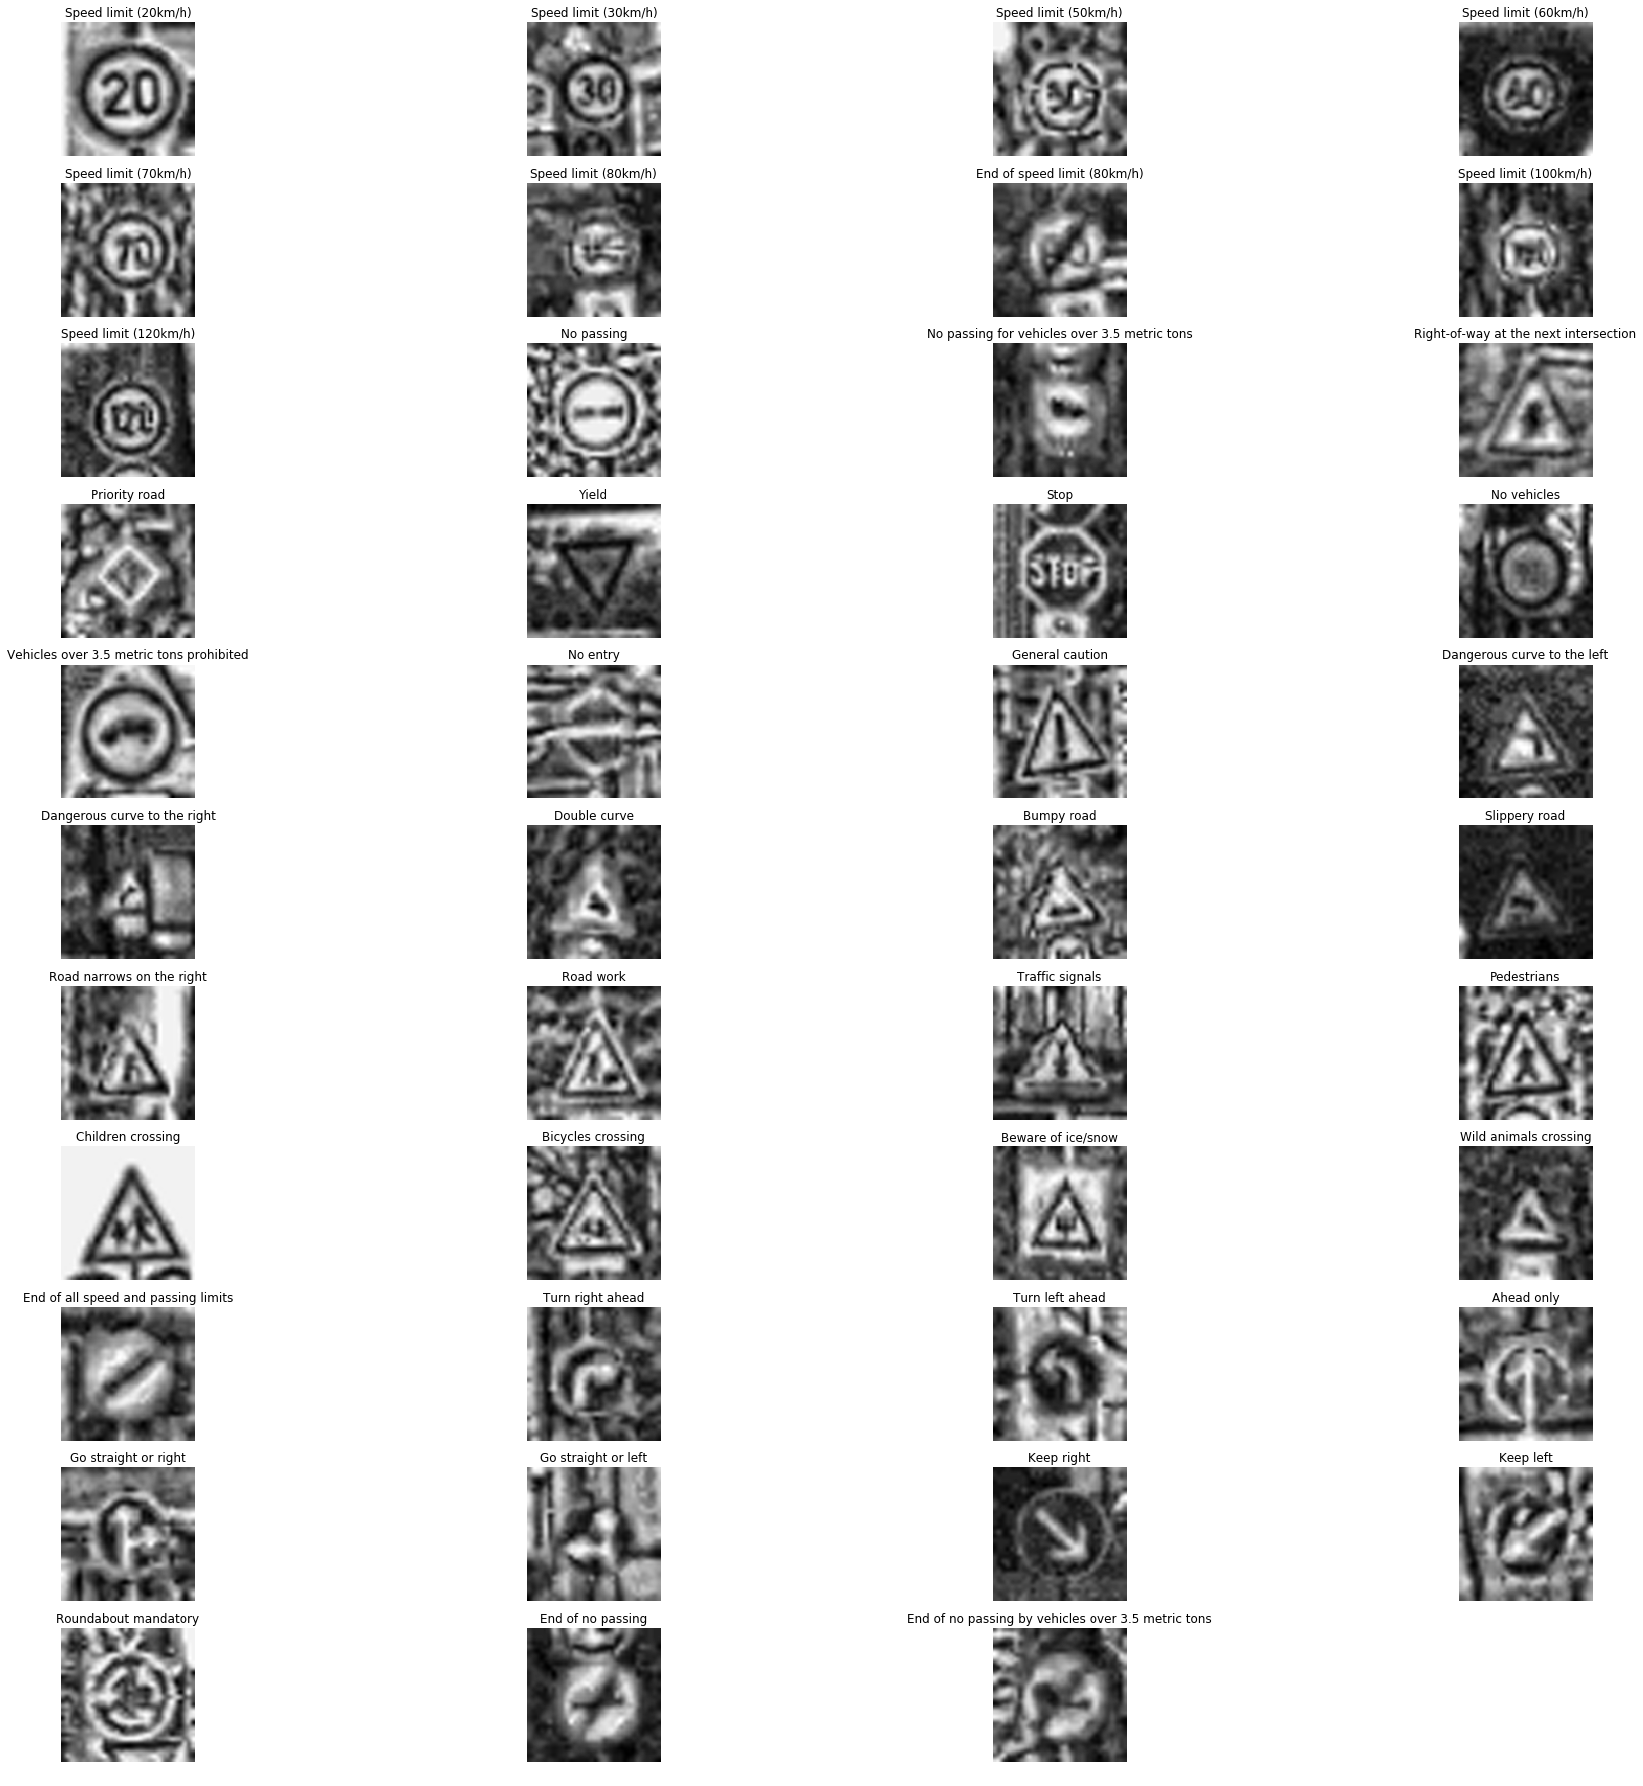

In [23]:
show_images(X_train, y_train)

### Model Architecture

In [132]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten, batch_norm
from spatial_transformer import transformer

In [ ]:
tf.reset_default_graph()
X_train = X_train.reshape([-1, 128, 128, 1])
X_valid = X_valid.reshape([-1, 128, 128, 1])
X_test  = X_test.reshape([-1, 128, 128, 1])

In [ ]:
%run -i -n inception_W_shapes.py
%run -i -n inception_b_shapes.py
%run -i -n loc_W_shapes.py
%run -i -n loc_b_shapes.py

CONFIG = {
    'EPOCHS': 200,
    'batch_size': 20,
    'channels': 1,
    'classes' : 43,
    'lr' : 0.00032
}

#### Helper Functions

##### Fundamental

In [ ]:
def conv2d(x, W_shape, b_shape, stride=1, padding='SAME'):
    """
    TODO: Add description
    """
    #Get Variables
    W = tf.get_variable("Wc", shape=W_shape, 
                        initializer=tf.truncated_normal_initializer(mean=0, stddev=0.1))
    b = tf.get_variable("bc", shape=b_shape, 
                        initializer=tf.constant_initializer(0.0))
    conv = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding)
    conv = tf.nn.bias_add(conv, b)
    
    return conv

def conv2d_relu(x, W_shape, b_shape, stride=1, padding='SAME'):
    """
    TODO: Add description
    """
    conv = conv2d(x, W_shape, b_shape, stride, padding)
    return tf.nn.relu(conv)
    

def maxpool2d(x, k=2, stride=2, padding='VALID'):
    """
    TODO: Add description
    """
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, stride, stride, 1],
                         padding=padding)

def linear_logits(x, W_shape, b_shape):
    """
    TODO: add description
    """
    #Get Variables
    W = tf.get_variable("Wlog", shape=W_shape, 
                        initializer=tf.truncated_normal_initializer(mean=0, stddev=0.1))
    b = tf.get_variable("blog", shape=b_shape,
                        initializer=tf.constant_initializer(0.0))
    linear = tf.add(tf.matmul(x, W), b)
    return linear

def linear_relu(x, W_shape, b_shape):
    """
    TODO: Add description
    """
    linear = linear_logits(x, W_shape, b_shape)
    return tf.nn.relu(linear)

def loc_logits(x, W_shape, b_shape):
    initial = np.array([[1.0, 0, 0], [0, 1.0, 0]])
    initial = initial.astype('float32')
    initial = initial.flatten()
    
    W = tf.get_variable("Wlog", shape=W_shape, initializer=tf.zeros_initializer())
    b = tf.get_variable("blog", shape=b_shape, initializer=tf.constant_initializer(initial))
    
    return tf.add(tf.matmul(batch_norm(x), W), b)
    

##### Localisation Net

In [ ]:
def locNet(x, W, b, name='loc'):
    """
    TODO: add description
    """
    with tf.variable_scope(name+'_conv1'):
            
        conv1 = batch_norm(conv2d_relu(x, W['wc1'], b['bc1'], stride=2, padding='SAME'))    
        
        if name is 'loc1' or name is 'loc2':
            # Pooling:
            pool1 = maxpool2d(conv1, k=2, stride=2, padding='SAME')
        else:
            pool1 = conv1
    
    with tf.variable_scope(name+'_conv2'):
        if name is 'loc1' or name is 'loc2':
            conv2 = batch_norm(conv2d_relu(pool1, W['wc2'], b['bc2'], stride=2, padding='SAME'))
        else:
            conv2 = batch_norm(conv2d_relu(pool1, W['wc2'], b['bc2'], stride=1, padding='SAME'))
        # Pooling. 
        if name is not 'loc2':
            pool2 = maxpool2d(conv2, k=2, stride=2, padding='SAME')
        else:
            pool2 = conv2

    if name is 'loc1' or name is 'loc2':
        pool1 = maxpool2d(pool1, k=4, stride=4, padding='SAME')
    if name is not 'loc2':
        pool2 = maxpool2d(pool2, k=2, stride=2, padding='SAME')
    
    with tf.variable_scope(name+'_fc1'):
        f0 = tf.concat([flatten(pool1), flatten(pool2)], 1)
        f1 = tf.nn.dropout(linear_relu(batch_norm(f0), W['wd1'], b['bd1']), loc_fc1_keepprob)
        
    with tf.variable_scope(name+'_fc2'):
        f2 = tf.nn.dropout(linear_relu(batch_norm(f1), W['wd2'], b['bd2']), loc_fc2_keepprob)
        
    with tf.variable_scope(name+'_out'):
        out = loc_logits(batch_norm(f2), W['out'], b['out'])
        
    return out

In [ ]:
def st1(x, net, W_shape, b_shape, out_dims):
    """
    TODO: add description
    """
    theta = locNet(x, W_shape, b_shape, name='loc1')
    x_t = transformer(net, theta, out_dims)
    return x_t, theta


def st2(x, net, W_shape, b_shape, out_dims):
    """
    TODO: add description
    """
    theta = locNet(x, W_shape, b_shape, name='loc2')
    x_t = transformer(net, theta, out_dims)
    return x_t, theta


def st3(x, net, W_shape, b_shape, out_dims):
    """
    TODO: add description
    """
    theta = locNet(x, W_shape, b_shape, name='loc3')
    x_t = transformer(net, theta, out_dims)
    return x_t, theta

def st4(x, net, W_shape, b_shape, out_dims):
    """
    TODO: add description
    """
    theta = locNet(x, W_shape, b_shape, name='loc4')
    x_t = transformer(net, theta, out_dims)
    return x_t, theta
    

##### Inception

In [ ]:
def inception(x, W, b, name='inception'):
    
    # Convolution 1x1 
    with tf.variable_scope(name+'_conv1x1'):
        conv1x1 = conv2d(x, W['w1x1'], b['b1x1'], stride=1, padding='SAME')
        tf.nn.dropout(conv1x1, inception_int_keepprob)
    # Layer 2: Convolution 1x1 and 3x3 
    with tf.variable_scope(name+'_conv3x3red'):
        conv3x3red = conv2d(x, W['w3x3red'], b['b3x3red'], stride=1, padding='SAME')
    with tf.variable_scope(name+'_con3x3'):
        conv3x3 = conv2d(conv3x3red, W['w3x3'], b['b3x3'], stride=1, padding='SAME')
        tf.nn.dropout(conv3x3, inception_int_keepprob)
    # Layer 3: Convolution 1x1 and 5x5
    with tf.variable_scope(name+'_conv5x5red'):
        conv5x5red = conv2d(x, W['w5x5red'], b['b5x5red'], stride=1, padding='SAME')
    with tf.variable_scope(name+'_conv5x5'):
        conv5x5 = conv2d(conv5x5red, W['w5x5'], b['b5x5'], stride=1, padding='SAME')
        tf.nn.dropout(conv5x5, inception_int_keepprob)
    # Layer 4: Convolution 1x1, 3x3 and Max Pooling 3x3
    with tf.variable_scope(name+'_pool3x3red'):
        conv3x3redp = conv2d(x, W['w3x3redp'], b['b3x3redp'], stride=1, padding='SAME')
    with tf.variable_scope(name+'_pool3x3'):
        conv3x3p = conv2d(conv3x3redp, W['w3x3p'], b['b3x3p'], stride=1, padding='SAME')    
        max3x3 = maxpool2d(conv3x3p, k=3, stride=1, padding='SAME')
        tf.nn.dropout(max3x3, inception_int_keepprob)
    # Filter Concatenation
    output = tf.concat([conv1x1, conv3x3, conv5x5, max3x3], 3)
    
    return output

In [ ]:
def inception3a_ST_3b(x):
    """
    TODO: Add description
    """
    # Inception Layer 3a: Input = 16x16x192, Output = 16x16x288
    with tf.name_scope('inception3a'):
        inception3a = inception(x, inceptNet3a_W, inceptNet3a_b, name='inception3a')
    
    # ST4
    #with tf.name_scope('stn4'):
    #    inception3a, theta = st4(inception3a, locNet4_W, locNet4_b, (16, 16, 288))
    
    # Inception Layer 3b: Input = 16x16x288, Output = 16x16x480
    with tf.name_scope('inception3b'):
        inception3b = batch_norm(inception(inception3a, inceptNet3b_W, inceptNet3b_b, name='inception3b'))
    
    return tf.nn.dropout(tf.nn.relu(inception3b),inception_keepprob)

def inception4(x):
    """
    TODO: Add description
    """
    # Inception 4a: Input = 8x8x480, Output = 8x8x512 
    with tf.name_scope('inception4a'):
        inception4a = inception(x, inceptNet3_W, inceptNet3_b, name='inception4a')
    
    # Inception 4b: Input = 8x8x512, Output = 8x8x512 (4b)
    with tf.name_scope('inception4b'):
        inception4b = inception(inception4a, inceptNet4_W, inceptNet4_b, name='inception4b')
    
    # Inception 4c: Input = 8x8x512, Output = 8x8x512 (4c)
    with tf.name_scope('inception4c'):
        inception4c = inception(inception4b, inceptNet5_W, inceptNet5_b, name='inception4c')
    
    # Inception 4d: Input = 8x8x512, Output = 8x8x528 (4d)
    with tf.name_scope('inception4d'):
        inception4d = inception(inception4c, inceptNet6_W, inceptNet6_b, name='inception4d')
    
    # Inception 4e: Input = 8x8x528, Output = 8x8x832 (4e)
    with tf.name_scope('inception4e'):
        inception4e = batch_norm(inception(inception4d, inceptNet7_W, inceptNet7_b, name='inception4e'))
    
    return tf.nn.dropout(tf.nn.relu(inception4e),inception_keepprob)


def inception5(x):
    
    # Inception 8: Input = 4x4x832, Output = 4x4x832 (5a)
    with tf.name_scope('inception5a'):
        inception5a = inception(x, inceptNet8_W, inceptNet8_b, name='inception5a')
    
    # Inception 9: Input = 4x4x832, Output = 4x4x1024 (5b)
    with tf.name_scope('inception5b'):
        inception5b = batch_norm(inception(inception5a, inceptNet9_W, inceptNet9_b, name='inception5b'))
    
    return tf.nn.dropout(tf.nn.relu(inception5b),inception_keepprob)

In [120]:
Net_W = {
    'wc1': [5, 5, CONFIG['channels'], 64],
    'wc2': [3, 3, 64, 192],
    'wd1': [1*1*1024, CONFIG['classes']],
}
Net_b = {
    'bc1': [Net_W['wc1'][3]],
    'bc2': [Net_W['wc2'][3]],
    'bd1': [Net_W['wd1'][1]],
}

def Net(x):
    """
    TODO: Add description
    """
    # ST1
    with tf.name_scope('stn1'):
        x_t, theta1 = st1(x, x, locNet1_W, locNet1_b, (128, 128, 1))
    
    # Layer 1: Convolutional. Input = 128x128x1, Output = 64x64x64.
    with tf.variable_scope('conv1'):
        conv1 = conv2d(x_t, Net_W['wc1'], Net_b['bc1'], stride=2, padding='SAME')
   
    # Pooling. Input = 64x64x64, Output = 32x32x64.
    conv1 = maxpool2d(conv1, k=3, stride=2, padding='SAME')
    
    # ST2
 #   with tf.name_scope('stn2'):
 #       conv1, theta2 = st2(x, conv1, locNet2_W, locNet2_b, (32, 32, 64))
    
    # Layer 2: Convolutional. Input = 32x32x64, Output = 32x32x192.
    with tf.variable_scope('conv2'):
        conv2 = conv2d(conv1, Net_W['wc2'], Net_b['bc2'], stride=1, padding='SAME')
        
    # Pooling. Input = 32x32x192. Output = 16x16x192.
    conv2 = maxpool2d(conv2, k=3, stride=2, padding='SAME')
    
#    with tf.name_scope('stn3'):
#        conv2, theta3 = st3(conv2, locNet3_W, locNet3_b, (16, 16, 192))
#########################################    
    inceptionL3 = inception3a_ST_3b(conv2)
    
    inceptionL3 = maxpool2d(inceptionL3, k=3, stride=2)
#######################################   

    inceptionL4 = inception4(inceptionL3)
    
    # Pooling: Input = 8x8x832, Output = 4x4x832 
    net = maxpool2d(inceptionL4, k=3, stride=2, padding='SAME')
    
#########################################################
    
    inceptionL5 = inception5(net)

##########################################################
    
    # Pooling: Input = 4x4x1024, Output = 1x1x1024
    avg_pool = tf.nn.avg_pool(inceptionL5, ksize=[1, 4, 4, 1], strides = [1, 1, 1, 1], padding='VALID')
    
    # Dropout: Input = 1x1x1024, Output = 1x1x1024
    drop_out = tf.nn.dropout(avg_pool, fc1_keepprob)
    
    # Flatten. Input = 1x1x1024. Output = 1024.
    f0 = flatten(drop_out)
                                  
    # Fully Connected. Input = 1024. Output = 43.
    with tf.variable_scope('logits'):
        logits = linear_logits(f0, Net_W['wd1'], Net_b['bd1'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [121]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Loss Function

In [122]:
def calc_loss(logits, one_hot_y):
    with tf.name_scope('Predictions'):
        predictions = tf.nn.softmax(logits)
    with tf.name_scope('Cross_Entropy'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    with tf.name_scope('Loss'):
        loss_operation = tf.reduce_mean(cross_entropy)
    return loss_operation
    

#### Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [123]:
with tf.name_scope('batch'):
    x = tf.placeholder(tf.float32, (None, imshape[0], imshape[1], imshape[2]), name='InputImages')
    y = tf.placeholder(tf.int32, (None), name='InputLabels')
    one_hot_y = tf.one_hot(y, n_classes, name='InputLabelsOneHot')


#### Dropout Placeholders

with tf.name_scope('dropout'):
    loc_fc1_keepprob = tf.placeholder(tf.float32, name='loc_fc1_do')
    loc_fc2_keepprob = tf.placeholder(tf.float32, name='loc_fc2_do')
    inception_keepprob = tf.placeholder(tf.float32, name='inception_do')
    fc1_keepprob = tf.placeholder(tf.float32, name='fc1_do')
    inception_int_keepprob = tf.placeholder(tf.float32, name='inception_int_do')
#### Learning Rate

starter_rate = tf.placeholder(tf.float32, name='lr')
global_step = tf.Variable(0, trainable=False, name='g_step')
learning_rate = tf.train.exponential_decay(starter_rate, global_step, 8700, 
                                           0.96, staircase=True)

#### Initialize Net

with tf.name_scope('logits'):
    logits = Net(x)

#### Prediction and Accuracy

with tf.name_scope('correct_prediction'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) 
    
with tf.name_scope('accuracy'):
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Loss Operation

with tf.name_scope('calc_loss'):
    loss_operation = calc_loss(logits, one_hot_y)
    
#### Optimization
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    
#### Backpropagation
with tf.name_scope('backpropagation'):
    training_operation = optimizer.minimize(loss_operation, global_step=global_step)



#### Training Pipeline

In [124]:
EPOCHS = CONFIG['EPOCHS']
BATCH_SIZE = CONFIG['batch_size']

#### Model Evaluation

In [ ]:
saver = tf.train.Saver(max_to_keep=10)

In [125]:
def evaluate(X_data, y_data, batch_size=1280):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = []
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        
        batch_accuracy, batch_loss = sess.run([accuracy_operation, loss_operation], 
                                              feed_dict={x: batch_x, 
                                                         y: batch_y,
                                                         loc_fc1_keepprob: 1.0,
                                                         loc_fc2_keepprob: 1.0,
                                                         inception_keepprob: 1.0,
                                                         fc1_keepprob: 1.0,
                                                         inception_int_keepprob: 1.0})
        
        total_accuracy += (batch_accuracy * len(batch_x))
        total_loss.append(batch_loss)
        
    return total_accuracy / num_examples, np.average(total_loss)

In [128]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    val_acc = []
    val_acc.append(0)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        #print(rate.eval())
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss, lr = sess.run([training_operation, loss_operation, learning_rate],
                                   feed_dict={x: batch_x, 
                                              y: batch_y,
                                              loc_fc1_keepprob: 0.6,
                                              loc_fc2_keepprob: 0.8,
                                              inception_keepprob: 0.4,
                                              inception_int_keepprob: 0.8,
                                              fc1_keepprob: 0.4})
            
        print("EPOCH {} ...".format(i+1))
        print("Loss = {:.6f}".format(loss))
        print("Learning Rate = {:.6f}".format(lr))
        training_accuracy = evaluate(X_train, y_train)[0]    
        validation_accuracy = evaluate(X_valid, y_valid)[0]
        val_acc.append(validation_accuracy)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if val_acc[-1] > val_acc[-2]:
            saver.save(sess, './models/Net_Epoch_{}_acc_{:.3f}'.format(i, val_acc[-1]))
            print("Model saved")

Training...




100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 1 ...
Loss = 0.596788
Learning Rate = 0.000320
Training Accuracy = 0.970
Validation Accuracy = 0.893

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:20<00:00, 12.39it/s]


EPOCH 2 ...
Loss = 0.023387
Learning Rate = 0.000320
Training Accuracy = 0.971
Validation Accuracy = 0.901

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 3 ...
Loss = 0.117371
Learning Rate = 0.000320
Training Accuracy = 0.983
Validation Accuracy = 0.929

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 4 ...
Loss = 0.105859
Learning Rate = 0.000320
Training Accuracy = 0.982
Validation Accuracy = 0.937

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.45it/s]


EPOCH 5 ...
Loss = 0.180647
Learning Rate = 0.000320
Training Accuracy = 0.993
Validation Accuracy = 0.949

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:20<00:00, 12.43it/s]


EPOCH 6 ...
Loss = 0.083054
Learning Rate = 0.000307
Training Accuracy = 0.991
Validation Accuracy = 0.954

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 7 ...
Loss = 0.024939
Learning Rate = 0.000307
Training Accuracy = 0.988
Validation Accuracy = 0.949



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 8 ...
Loss = 0.047822
Learning Rate = 0.000307
Training Accuracy = 0.989
Validation Accuracy = 0.939



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 9 ...
Loss = 0.061225
Learning Rate = 0.000307
Training Accuracy = 0.991
Validation Accuracy = 0.948

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 10 ...
Loss = 0.020889
Learning Rate = 0.000307
Training Accuracy = 0.949
Validation Accuracy = 0.886



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 11 ...
Loss = 0.012029
Learning Rate = 0.000295
Training Accuracy = 0.994
Validation Accuracy = 0.954

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 12 ...
Loss = 0.004815
Learning Rate = 0.000295
Training Accuracy = 0.994
Validation Accuracy = 0.954

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 13 ...
Loss = 0.002824
Learning Rate = 0.000295
Training Accuracy = 0.987
Validation Accuracy = 0.925



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 14 ...
Loss = 0.051728
Learning Rate = 0.000295
Training Accuracy = 0.989
Validation Accuracy = 0.928

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 15 ...
Loss = 0.038728
Learning Rate = 0.000295
Training Accuracy = 0.988
Validation Accuracy = 0.931

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 16 ...
Loss = 0.090019
Learning Rate = 0.000283
Training Accuracy = 0.992
Validation Accuracy = 0.946

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 17 ...
Loss = 0.453093
Learning Rate = 0.000283
Training Accuracy = 0.996
Validation Accuracy = 0.962

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 18 ...
Loss = 0.011783
Learning Rate = 0.000283
Training Accuracy = 0.996
Validation Accuracy = 0.966

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 19 ...
Loss = 0.000938
Learning Rate = 0.000283
Training Accuracy = 0.995
Validation Accuracy = 0.962



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 20 ...
Loss = 0.095289
Learning Rate = 0.000283
Training Accuracy = 0.996
Validation Accuracy = 0.971

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 21 ...
Loss = 0.005312
Learning Rate = 0.000272
Training Accuracy = 0.994
Validation Accuracy = 0.952



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 22 ...
Loss = 0.000518
Learning Rate = 0.000272
Training Accuracy = 0.993
Validation Accuracy = 0.939



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 23 ...
Loss = 0.008268
Learning Rate = 0.000272
Training Accuracy = 0.997
Validation Accuracy = 0.961

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 24 ...
Loss = 0.008757
Learning Rate = 0.000272
Training Accuracy = 0.991
Validation Accuracy = 0.949



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 25 ...
Loss = 0.015807
Learning Rate = 0.000272
Training Accuracy = 0.998
Validation Accuracy = 0.976

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 26 ...
Loss = 0.000008
Learning Rate = 0.000261
Training Accuracy = 0.998
Validation Accuracy = 0.967



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 27 ...
Loss = 0.080054
Learning Rate = 0.000261
Training Accuracy = 0.996
Validation Accuracy = 0.971

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 28 ...
Loss = 0.000207
Learning Rate = 0.000261
Training Accuracy = 0.997
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 29 ...
Loss = 0.125230
Learning Rate = 0.000261
Training Accuracy = 0.990
Validation Accuracy = 0.955



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 30 ...
Loss = 0.355281
Learning Rate = 0.000261
Training Accuracy = 0.981
Validation Accuracy = 0.933



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 31 ...
Loss = 0.000019
Learning Rate = 0.000250
Training Accuracy = 0.998
Validation Accuracy = 0.974

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 32 ...
Loss = 0.001282
Learning Rate = 0.000250
Training Accuracy = 0.992
Validation Accuracy = 0.937



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 33 ...
Loss = 0.001028
Learning Rate = 0.000250
Training Accuracy = 0.997
Validation Accuracy = 0.970

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.47it/s]


EPOCH 34 ...
Loss = 0.013927
Learning Rate = 0.000250
Training Accuracy = 0.973
Validation Accuracy = 0.926



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 35 ...
Loss = 0.001681
Learning Rate = 0.000250
Training Accuracy = 0.986
Validation Accuracy = 0.950

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 36 ...
Loss = 0.000223
Learning Rate = 0.000240
Training Accuracy = 0.996
Validation Accuracy = 0.963

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 37 ...
Loss = 0.000065
Learning Rate = 0.000240
Training Accuracy = 0.990
Validation Accuracy = 0.957



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 38 ...
Loss = 0.006955
Learning Rate = 0.000240
Training Accuracy = 0.996
Validation Accuracy = 0.961

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 39 ...
Loss = 0.017797
Learning Rate = 0.000240
Training Accuracy = 0.996
Validation Accuracy = 0.968

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.47it/s]


EPOCH 40 ...
Loss = 0.007338
Learning Rate = 0.000240
Training Accuracy = 0.997
Validation Accuracy = 0.975

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 41 ...
Loss = 0.001155
Learning Rate = 0.000231
Training Accuracy = 0.999
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 42 ...
Loss = 0.000305
Learning Rate = 0.000231
Training Accuracy = 0.995
Validation Accuracy = 0.966



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 43 ...
Loss = 0.000237
Learning Rate = 0.000231
Training Accuracy = 0.997
Validation Accuracy = 0.971

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.44it/s]


EPOCH 44 ...
Loss = 0.002618
Learning Rate = 0.000231
Training Accuracy = 0.996
Validation Accuracy = 0.959



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 45 ...
Loss = 0.002155
Learning Rate = 0.000231
Training Accuracy = 0.995
Validation Accuracy = 0.965

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 46 ...
Loss = 0.003977
Learning Rate = 0.000222
Training Accuracy = 0.999
Validation Accuracy = 0.976

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 47 ...
Loss = 0.081073
Learning Rate = 0.000222
Training Accuracy = 0.998
Validation Accuracy = 0.971



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.57it/s]


EPOCH 48 ...
Loss = 0.017516
Learning Rate = 0.000222
Training Accuracy = 0.994
Validation Accuracy = 0.957



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 49 ...
Loss = 0.019118
Learning Rate = 0.000222
Training Accuracy = 0.996
Validation Accuracy = 0.955



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 50 ...
Loss = 0.000011
Learning Rate = 0.000222
Training Accuracy = 0.999
Validation Accuracy = 0.975

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 51 ...
Loss = 0.000006
Learning Rate = 0.000213
Training Accuracy = 0.998
Validation Accuracy = 0.972



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 52 ...
Loss = 0.000112
Learning Rate = 0.000213
Training Accuracy = 0.999
Validation Accuracy = 0.975

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 53 ...
Loss = 0.000008
Learning Rate = 0.000213
Training Accuracy = 0.993
Validation Accuracy = 0.954



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 54 ...
Loss = 0.000094
Learning Rate = 0.000213
Training Accuracy = 0.997
Validation Accuracy = 0.965

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 55 ...
Loss = 0.000351
Learning Rate = 0.000213
Training Accuracy = 0.982
Validation Accuracy = 0.946



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 56 ...
Loss = 0.002983
Learning Rate = 0.000204
Training Accuracy = 0.996
Validation Accuracy = 0.968

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 57 ...
Loss = 0.000201
Learning Rate = 0.000204
Training Accuracy = 0.996
Validation Accuracy = 0.962



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 58 ...
Loss = 0.000001
Learning Rate = 0.000204
Training Accuracy = 0.998
Validation Accuracy = 0.971

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 59 ...
Loss = 0.000002
Learning Rate = 0.000204
Training Accuracy = 0.998
Validation Accuracy = 0.972

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.47it/s]


EPOCH 60 ...
Loss = 0.000021
Learning Rate = 0.000204
Training Accuracy = 1.000
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 61 ...
Loss = 0.000000
Learning Rate = 0.000196
Training Accuracy = 0.998
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 62 ...
Loss = 0.000880
Learning Rate = 0.000196
Training Accuracy = 0.998
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 63 ...
Loss = 0.000016
Learning Rate = 0.000196
Training Accuracy = 0.998
Validation Accuracy = 0.961



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 64 ...
Loss = 0.000044
Learning Rate = 0.000196
Training Accuracy = 0.996
Validation Accuracy = 0.963

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 65 ...
Loss = 0.000011
Learning Rate = 0.000196
Training Accuracy = 0.997
Validation Accuracy = 0.970

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 66 ...
Loss = 0.000122
Learning Rate = 0.000188
Training Accuracy = 0.995
Validation Accuracy = 0.963



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 67 ...
Loss = 0.000200
Learning Rate = 0.000188
Training Accuracy = 0.999
Validation Accuracy = 0.972

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 68 ...
Loss = 0.003948
Learning Rate = 0.000188
Training Accuracy = 0.996
Validation Accuracy = 0.961



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 69 ...
Loss = 0.000003
Learning Rate = 0.000188
Training Accuracy = 0.997
Validation Accuracy = 0.966

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 70 ...
Loss = 0.000396
Learning Rate = 0.000188
Training Accuracy = 0.999
Validation Accuracy = 0.972

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 71 ...
Loss = 0.000038
Learning Rate = 0.000181
Training Accuracy = 0.999
Validation Accuracy = 0.972

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 72 ...
Loss = 0.000001
Learning Rate = 0.000181
Training Accuracy = 0.999
Validation Accuracy = 0.972



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 73 ...
Loss = 0.000006
Learning Rate = 0.000181
Training Accuracy = 0.998
Validation Accuracy = 0.974

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 74 ...
Loss = 0.000062
Learning Rate = 0.000181
Training Accuracy = 0.994
Validation Accuracy = 0.959



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 75 ...
Loss = 0.000377
Learning Rate = 0.000181
Training Accuracy = 0.996
Validation Accuracy = 0.969

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 76 ...
Loss = 0.000091
Learning Rate = 0.000173
Training Accuracy = 0.999
Validation Accuracy = 0.976

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 77 ...
Loss = 0.013396
Learning Rate = 0.000173
Training Accuracy = 0.999
Validation Accuracy = 0.971



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.57it/s]


EPOCH 78 ...
Loss = 0.000000
Learning Rate = 0.000173
Training Accuracy = 0.987
Validation Accuracy = 0.954



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 79 ...
Loss = 0.000000
Learning Rate = 0.000173
Training Accuracy = 0.986
Validation Accuracy = 0.961

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 80 ...
Loss = 0.004537
Learning Rate = 0.000173
Training Accuracy = 0.999
Validation Accuracy = 0.974

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 81 ...
Loss = 0.000060
Learning Rate = 0.000167
Training Accuracy = 0.998
Validation Accuracy = 0.973



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 82 ...
Loss = 0.002902
Learning Rate = 0.000167
Training Accuracy = 0.995
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 83 ...
Loss = 0.001264
Learning Rate = 0.000167
Training Accuracy = 0.997
Validation Accuracy = 0.972

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 84 ...
Loss = 0.000038
Learning Rate = 0.000167
Training Accuracy = 0.998
Validation Accuracy = 0.973

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 85 ...
Loss = 0.000083
Learning Rate = 0.000167
Training Accuracy = 0.998
Validation Accuracy = 0.972



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 86 ...
Loss = 0.000035
Learning Rate = 0.000160
Training Accuracy = 0.996
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 87 ...
Loss = 0.000002
Learning Rate = 0.000160
Training Accuracy = 0.999
Validation Accuracy = 0.976

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 88 ...
Loss = 0.000001
Learning Rate = 0.000160
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 89 ...
Loss = 0.000224
Learning Rate = 0.000160
Training Accuracy = 0.998
Validation Accuracy = 0.976



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 90 ...
Loss = 0.000000
Learning Rate = 0.000160
Training Accuracy = 0.998
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 91 ...
Loss = 0.000000
Learning Rate = 0.000153
Training Accuracy = 1.000
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.57it/s]


EPOCH 92 ...
Loss = 0.000100
Learning Rate = 0.000153
Training Accuracy = 0.999
Validation Accuracy = 0.976



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 93 ...
Loss = 0.000286
Learning Rate = 0.000153
Training Accuracy = 0.999
Validation Accuracy = 0.970



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 94 ...
Loss = 0.000112
Learning Rate = 0.000153
Training Accuracy = 0.998
Validation Accuracy = 0.969



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 95 ...
Loss = 0.000003
Learning Rate = 0.000153
Training Accuracy = 1.000
Validation Accuracy = 0.973

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 96 ...
Loss = 0.000000
Learning Rate = 0.000147
Training Accuracy = 0.999
Validation Accuracy = 0.972



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 97 ...
Loss = 0.020798
Learning Rate = 0.000147
Training Accuracy = 0.999
Validation Accuracy = 0.976

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 98 ...
Loss = 0.000000
Learning Rate = 0.000147
Training Accuracy = 1.000
Validation Accuracy = 0.979

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 99 ...
Loss = 0.000263
Learning Rate = 0.000147
Training Accuracy = 0.996
Validation Accuracy = 0.958



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.45it/s]


EPOCH 100 ...
Loss = 0.000000
Learning Rate = 0.000147
Training Accuracy = 0.997
Validation Accuracy = 0.975

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.47it/s]


EPOCH 101 ...
Loss = 0.000022
Learning Rate = 0.000141
Training Accuracy = 0.995
Validation Accuracy = 0.967



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 102 ...
Loss = 0.009250
Learning Rate = 0.000141
Training Accuracy = 1.000
Validation Accuracy = 0.980

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 103 ...
Loss = 0.000009
Learning Rate = 0.000141
Training Accuracy = 0.999
Validation Accuracy = 0.973



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 104 ...
Loss = 0.028959
Learning Rate = 0.000141
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 105 ...
Loss = 0.000026
Learning Rate = 0.000141
Training Accuracy = 0.997
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 106 ...
Loss = 0.001241
Learning Rate = 0.000136
Training Accuracy = 0.999
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 107 ...
Loss = 0.000000
Learning Rate = 0.000136
Training Accuracy = 0.996
Validation Accuracy = 0.966



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 108 ...
Loss = 0.003692
Learning Rate = 0.000136
Training Accuracy = 0.998
Validation Accuracy = 0.974

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 109 ...
Loss = 0.000006
Learning Rate = 0.000136
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 110 ...
Loss = 0.000000
Learning Rate = 0.000136
Training Accuracy = 0.999
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 111 ...
Loss = 0.000086
Learning Rate = 0.000130
Training Accuracy = 1.000
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 112 ...
Loss = 0.000380
Learning Rate = 0.000130
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 113 ...
Loss = 0.000039
Learning Rate = 0.000130
Training Accuracy = 0.993
Validation Accuracy = 0.965



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.86it/s]


EPOCH 114 ...
Loss = 0.000006
Learning Rate = 0.000130
Training Accuracy = 0.997
Validation Accuracy = 0.970

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 115 ...
Loss = 0.006782
Learning Rate = 0.000130
Training Accuracy = 0.999
Validation Accuracy = 0.980

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 116 ...
Loss = 0.000021
Learning Rate = 0.000125
Training Accuracy = 0.998
Validation Accuracy = 0.972



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 117 ...
Loss = 0.000016
Learning Rate = 0.000125
Training Accuracy = 0.999
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 118 ...
Loss = 0.000000
Learning Rate = 0.000125
Training Accuracy = 0.999
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 119 ...
Loss = 0.002094
Learning Rate = 0.000125
Training Accuracy = 0.999
Validation Accuracy = 0.970



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 120 ...
Loss = 0.000047
Learning Rate = 0.000125
Training Accuracy = 0.999
Validation Accuracy = 0.980

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.58it/s]


EPOCH 121 ...
Loss = 0.000000
Learning Rate = 0.000120
Training Accuracy = 0.999
Validation Accuracy = 0.971



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 122 ...
Loss = 0.000056
Learning Rate = 0.000120
Training Accuracy = 0.998
Validation Accuracy = 0.973

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 123 ...
Loss = 0.000019
Learning Rate = 0.000120
Training Accuracy = 0.998
Validation Accuracy = 0.971



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 124 ...
Loss = 0.000000
Learning Rate = 0.000120
Training Accuracy = 0.997
Validation Accuracy = 0.970



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 125 ...
Loss = 0.000001
Learning Rate = 0.000120
Training Accuracy = 0.999
Validation Accuracy = 0.972

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 126 ...
Loss = 0.000002
Learning Rate = 0.000115
Training Accuracy = 0.999
Validation Accuracy = 0.974

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 127 ...
Loss = 0.000044
Learning Rate = 0.000115
Training Accuracy = 0.998
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.47it/s]


EPOCH 128 ...
Loss = 0.000000
Learning Rate = 0.000115
Training Accuracy = 0.998
Validation Accuracy = 0.973

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 129 ...
Loss = 0.010835
Learning Rate = 0.000115
Training Accuracy = 0.998
Validation Accuracy = 0.970



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 130 ...
Loss = 0.000232
Learning Rate = 0.000115
Training Accuracy = 0.998
Validation Accuracy = 0.969



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 131 ...
Loss = 0.000001
Learning Rate = 0.000111
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 132 ...
Loss = 0.000190
Learning Rate = 0.000111
Training Accuracy = 0.999
Validation Accuracy = 0.977



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 133 ...
Loss = 0.171628
Learning Rate = 0.000111
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 134 ...
Loss = 0.000000
Learning Rate = 0.000111
Training Accuracy = 0.998
Validation Accuracy = 0.971



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 135 ...
Loss = 0.000000
Learning Rate = 0.000111
Training Accuracy = 0.999
Validation Accuracy = 0.976

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 136 ...
Loss = 0.000018
Learning Rate = 0.000106
Training Accuracy = 0.999
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 137 ...
Loss = 0.000002
Learning Rate = 0.000106
Training Accuracy = 0.999
Validation Accuracy = 0.979

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 138 ...
Loss = 0.000005
Learning Rate = 0.000106
Training Accuracy = 0.997
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 139 ...
Loss = 0.000163
Learning Rate = 0.000106
Training Accuracy = 0.999
Validation Accuracy = 0.978

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 140 ...
Loss = 0.000000
Learning Rate = 0.000106
Training Accuracy = 0.999
Validation Accuracy = 0.978



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 141 ...
Loss = 0.000437
Learning Rate = 0.000102
Training Accuracy = 0.999
Validation Accuracy = 0.976



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 142 ...
Loss = 0.000001
Learning Rate = 0.000102
Training Accuracy = 0.999
Validation Accuracy = 0.980

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 143 ...
Loss = 0.000014
Learning Rate = 0.000102
Training Accuracy = 0.998
Validation Accuracy = 0.968



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 144 ...
Loss = 0.000000
Learning Rate = 0.000102
Training Accuracy = 1.000
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 145 ...
Loss = 0.000340
Learning Rate = 0.000102
Training Accuracy = 1.000
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 146 ...
Loss = 0.000186
Learning Rate = 0.000098
Training Accuracy = 1.000
Validation Accuracy = 0.981

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 147 ...
Loss = 0.000000
Learning Rate = 0.000098
Training Accuracy = 0.999
Validation Accuracy = 0.979



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 148 ...
Loss = 0.119485
Learning Rate = 0.000098
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 149 ...
Loss = 0.000001
Learning Rate = 0.000098
Training Accuracy = 1.000
Validation Accuracy = 0.977



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 150 ...
Loss = 0.000153
Learning Rate = 0.000098
Training Accuracy = 1.000
Validation Accuracy = 0.981

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 151 ...
Loss = 0.000000
Learning Rate = 0.000094
Training Accuracy = 0.999
Validation Accuracy = 0.980



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 152 ...
Loss = 0.000000
Learning Rate = 0.000094
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 153 ...
Loss = 0.000005
Learning Rate = 0.000094
Training Accuracy = 0.999
Validation Accuracy = 0.980



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 154 ...
Loss = 0.000000
Learning Rate = 0.000094
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 13.11it/s]


EPOCH 155 ...
Loss = 0.000000
Learning Rate = 0.000094
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 156 ...
Loss = 0.000056
Learning Rate = 0.000090
Training Accuracy = 1.000
Validation Accuracy = 0.985

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.72it/s]


EPOCH 157 ...
Loss = 0.000000
Learning Rate = 0.000090
Training Accuracy = 1.000
Validation Accuracy = 0.979



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.46it/s]


EPOCH 158 ...
Loss = 0.000000
Learning Rate = 0.000090
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 159 ...
Loss = 0.000000
Learning Rate = 0.000090
Training Accuracy = 1.000
Validation Accuracy = 0.980



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 160 ...
Loss = 0.000001
Learning Rate = 0.000090
Training Accuracy = 1.000
Validation Accuracy = 0.981

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 161 ...
Loss = 0.000000
Learning Rate = 0.000087
Training Accuracy = 0.998
Validation Accuracy = 0.975



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 162 ...
Loss = 0.000000
Learning Rate = 0.000087
Training Accuracy = 0.999
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.57it/s]


EPOCH 163 ...
Loss = 0.000000
Learning Rate = 0.000087
Training Accuracy = 0.994
Validation Accuracy = 0.967



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 164 ...
Loss = 0.000000
Learning Rate = 0.000087
Training Accuracy = 0.999
Validation Accuracy = 0.982

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 165 ...
Loss = 0.000000
Learning Rate = 0.000087
Training Accuracy = 0.999
Validation Accuracy = 0.980



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.58it/s]


EPOCH 166 ...
Loss = 0.000000
Learning Rate = 0.000083
Training Accuracy = 0.999
Validation Accuracy = 0.980



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 167 ...
Loss = 0.000001
Learning Rate = 0.000083
Training Accuracy = 0.999
Validation Accuracy = 0.982

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 168 ...
Loss = 0.000000
Learning Rate = 0.000083
Training Accuracy = 0.999
Validation Accuracy = 0.978



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 169 ...
Loss = 0.000001
Learning Rate = 0.000083
Training Accuracy = 0.997
Validation Accuracy = 0.974



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 170 ...
Loss = 0.000000
Learning Rate = 0.000083
Training Accuracy = 0.999
Validation Accuracy = 0.980

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.55it/s]


EPOCH 171 ...
Loss = 0.000000
Learning Rate = 0.000080
Training Accuracy = 0.999
Validation Accuracy = 0.982

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 172 ...
Loss = 0.000003
Learning Rate = 0.000080
Training Accuracy = 0.997
Validation Accuracy = 0.981



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.54it/s]


EPOCH 173 ...
Loss = 0.000004
Learning Rate = 0.000080
Training Accuracy = 0.997
Validation Accuracy = 0.981

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.58it/s]


EPOCH 174 ...
Loss = 0.000000
Learning Rate = 0.000080
Training Accuracy = 0.999
Validation Accuracy = 0.979



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 175 ...
Loss = 0.000361
Learning Rate = 0.000080
Training Accuracy = 0.999
Validation Accuracy = 0.978



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 176 ...
Loss = 0.000012
Learning Rate = 0.000077
Training Accuracy = 1.000
Validation Accuracy = 0.981

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 177 ...
Loss = 0.000000
Learning Rate = 0.000077
Training Accuracy = 0.999
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.47it/s]


EPOCH 178 ...
Loss = 0.002778
Learning Rate = 0.000077
Training Accuracy = 1.000
Validation Accuracy = 0.983



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 179 ...
Loss = 0.000000
Learning Rate = 0.000077
Training Accuracy = 1.000
Validation Accuracy = 0.980



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 180 ...
Loss = 0.000001
Learning Rate = 0.000077
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.52it/s]


EPOCH 181 ...
Loss = 0.000000
Learning Rate = 0.000074
Training Accuracy = 1.000
Validation Accuracy = 0.981



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 182 ...
Loss = 0.000001
Learning Rate = 0.000074
Training Accuracy = 1.000
Validation Accuracy = 0.979



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 183 ...
Loss = 0.000000
Learning Rate = 0.000074
Training Accuracy = 1.000
Validation Accuracy = 0.982

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 184 ...
Loss = 0.000000
Learning Rate = 0.000074
Training Accuracy = 0.999
Validation Accuracy = 0.974



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.56it/s]


EPOCH 185 ...
Loss = 0.000000
Learning Rate = 0.000074
Training Accuracy = 0.999
Validation Accuracy = 0.977

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 186 ...
Loss = 0.000000
Learning Rate = 0.000071
Training Accuracy = 1.000
Validation Accuracy = 0.982

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.72it/s]


EPOCH 187 ...
Loss = 0.000000
Learning Rate = 0.000071
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 188 ...
Loss = 0.000001
Learning Rate = 0.000071
Training Accuracy = 1.000
Validation Accuracy = 0.983



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 189 ...
Loss = 0.000000
Learning Rate = 0.000071
Training Accuracy = 1.000
Validation Accuracy = 0.983

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.48it/s]


EPOCH 190 ...
Loss = 0.000134
Learning Rate = 0.000071
Training Accuracy = 0.999
Validation Accuracy = 0.979



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.50it/s]


EPOCH 191 ...
Loss = 0.000000
Learning Rate = 0.000068
Training Accuracy = 0.999
Validation Accuracy = 0.978



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 192 ...
Loss = 0.000000
Learning Rate = 0.000068
Training Accuracy = 0.999
Validation Accuracy = 0.979

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.52it/s]


EPOCH 193 ...
Loss = 0.000000
Learning Rate = 0.000068
Training Accuracy = 1.000
Validation Accuracy = 0.977



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.49it/s]


EPOCH 194 ...
Loss = 0.000000
Learning Rate = 0.000068
Training Accuracy = 1.000
Validation Accuracy = 0.979

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.57it/s]


EPOCH 195 ...
Loss = 0.000000
Learning Rate = 0.000068
Training Accuracy = 1.000
Validation Accuracy = 0.985

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 196 ...
Loss = 0.000000
Learning Rate = 0.000065
Training Accuracy = 1.000
Validation Accuracy = 0.983



100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 197 ...
Loss = 0.000000
Learning Rate = 0.000065
Training Accuracy = 1.000
Validation Accuracy = 0.984

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:18<00:00, 12.53it/s]


EPOCH 198 ...
Loss = 0.000000
Learning Rate = 0.000065
Training Accuracy = 1.000
Validation Accuracy = 0.986

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 199 ...
Loss = 0.000004
Learning Rate = 0.000065
Training Accuracy = 1.000
Validation Accuracy = 0.986

Model saved


100%|███████████████████████████████████████████████████████████████████████████| 1740/1740 [02:19<00:00, 12.51it/s]


EPOCH 200 ...
Loss = 0.000000
Learning Rate = 0.000065
Training Accuracy = 1.000
Validation Accuracy = 0.985



In [131]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/'))
    test_accuracy = evaluate(X_test, y_test)[0]
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./models/Net_Epoch_198_acc_0.986
Test Accuracy = 0.991


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")